# Introduction

### Goal: The goal of this lab was to determine the effect of location on the measured counts per minute. When collecting data over the course of approximately thirty minutes, we had neglected to select temperature and 2.5 P concentration. Additionally, we were not able to get the GPS component of our data collection functional. However, we did note approximately where geographically we stopped for each measurement. As such, our data has an added layer of error / uncertainty, and our analysis will be in respect to this more limited data. More on this uncertainty will be covered in the later discussion section.

# Experimental Setup

### Over the course of our collection, we used the detector configured to measure radiation counts every five seconds. The procedure for our data collection is as follows: at each stop, we would stand still for thirty seconds, obtaining six data points per location. We would then move to our next location at a steady pace, stop for another thirty seconds, rinse and repeat. We did our best to ensure that each location was approximately equally spaced and took equal amount of time to move between. The intent was to allow us to differentiate our data between points measured while moving from location to location and the actual data recorded at each location. However, our analyzed data is for the full time period including the time taken to move from point to point. See below the map of the route we took:

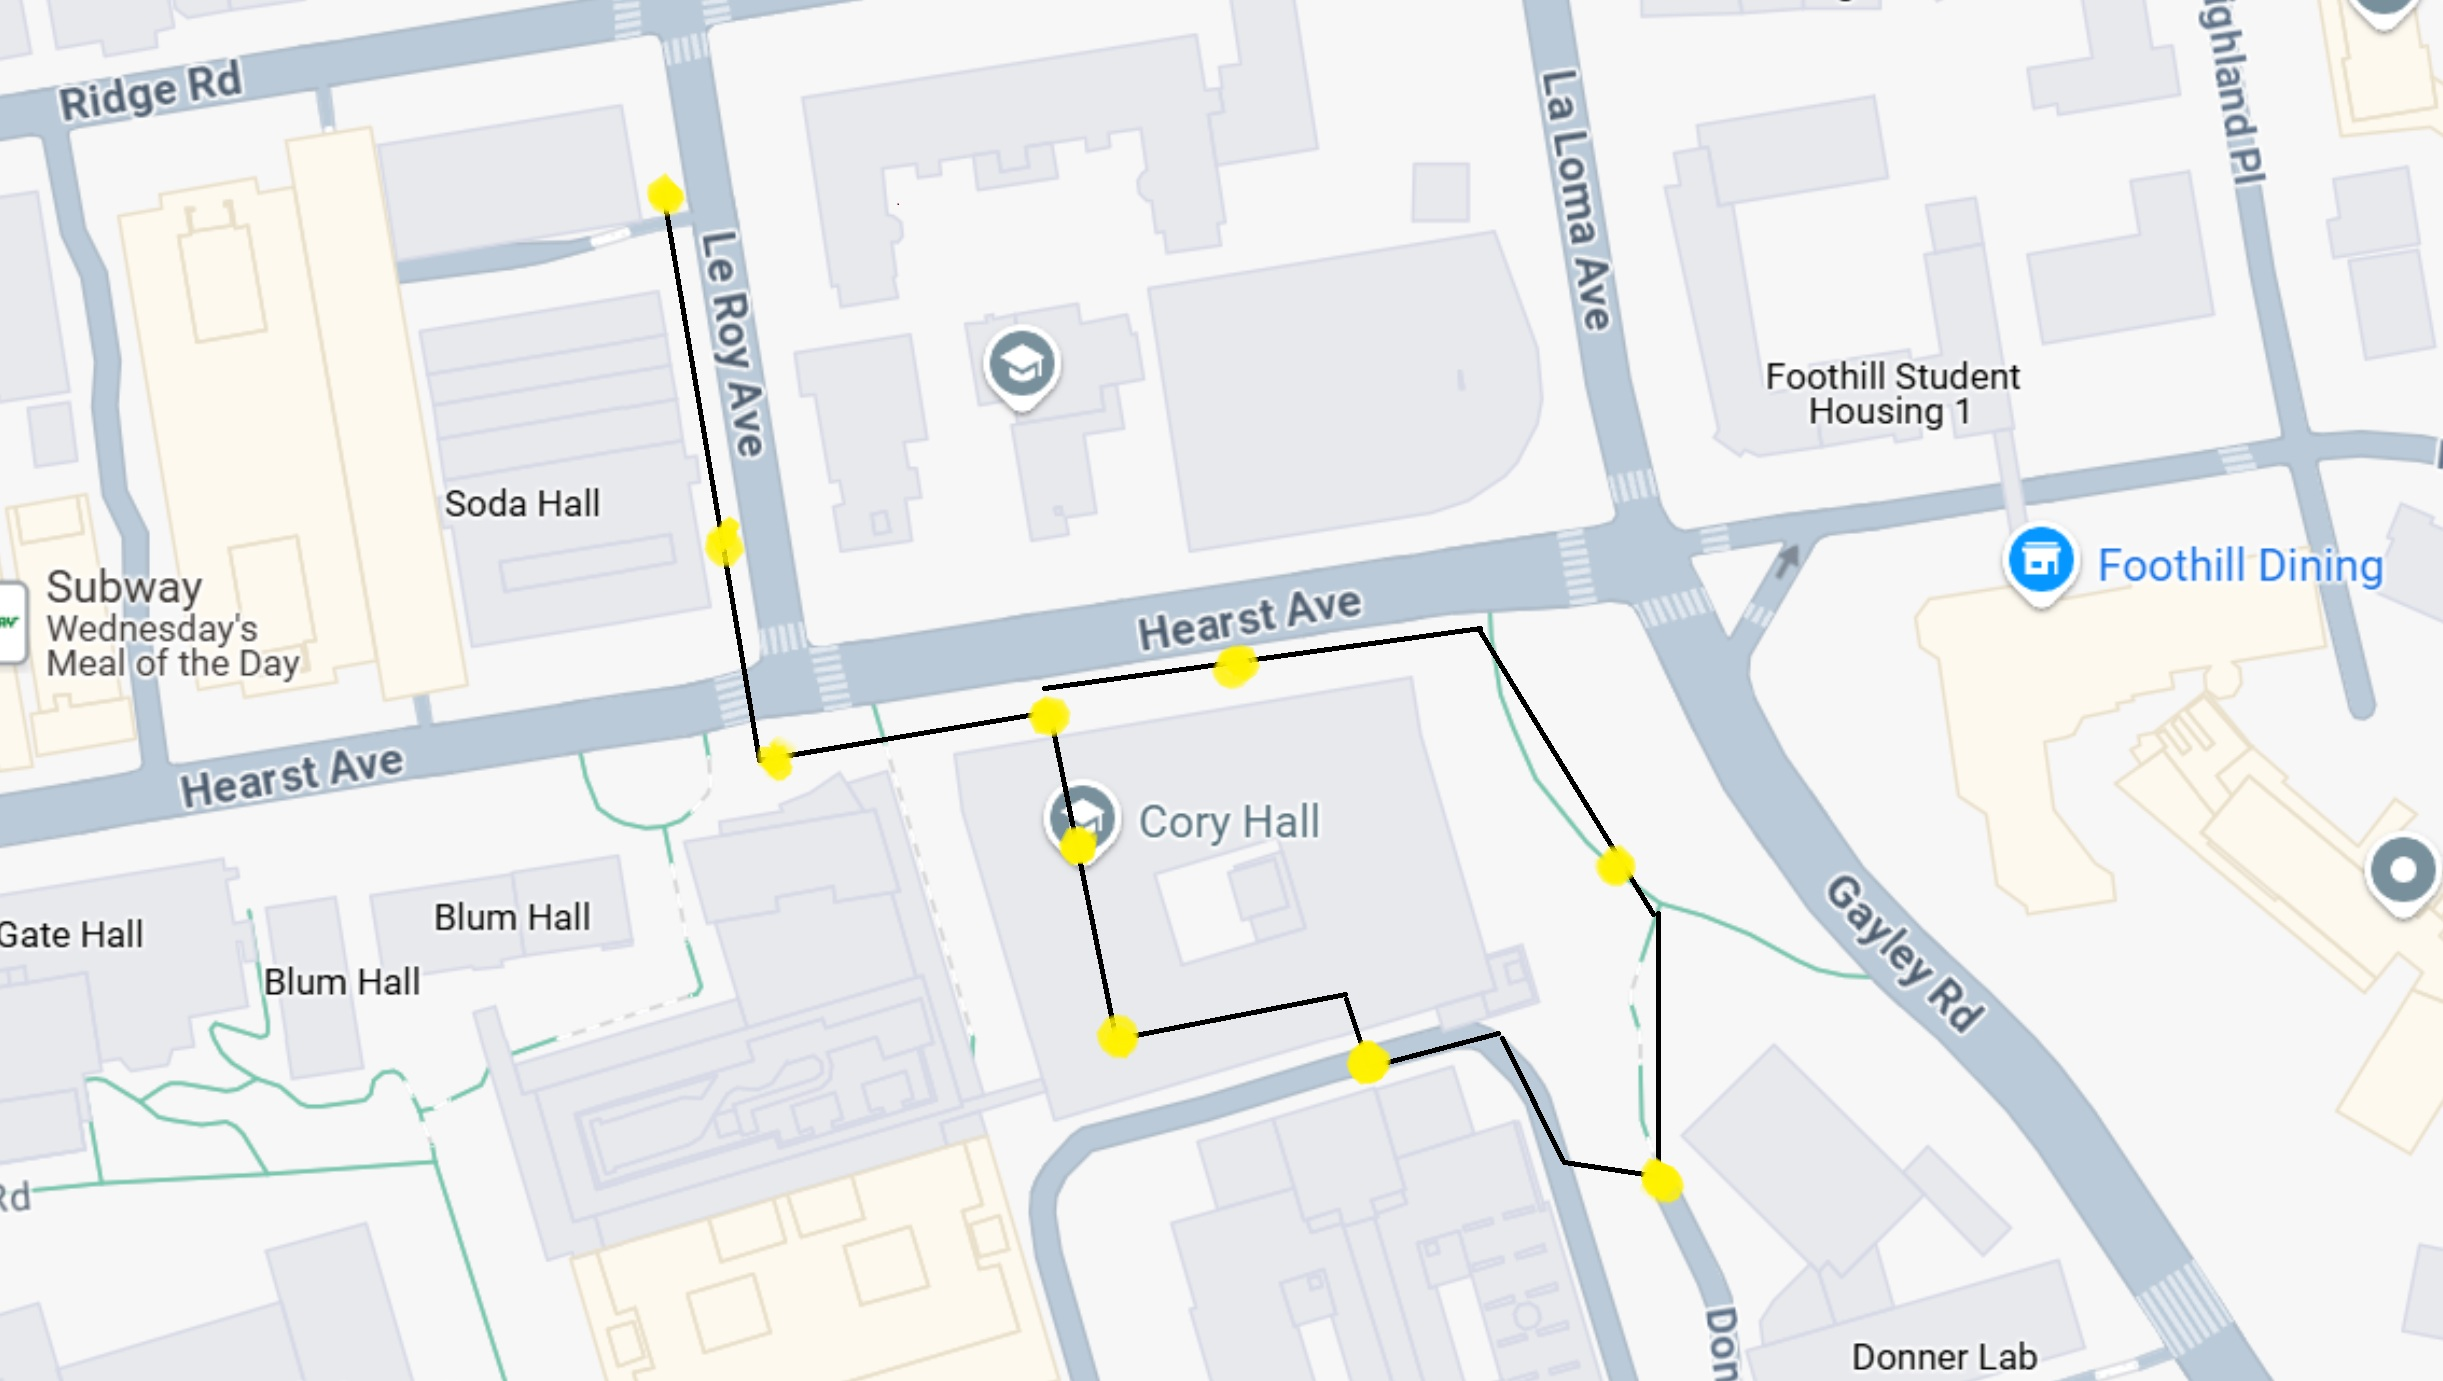

# Data Analysis

In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
Data1=pd.read_csv('Loc1_session1_group1_2025-04-16_15-20-50.csv',usecols=[0,3])
Data2=pd.read_csv('Loc1_session1_group1_2025-04-16_15-26-45.csv',usecols=[0,3])
Data=pd.concat([Data1, Data2], ignore_index=True)

Text(0.5, 1.0, 'CPM vs. Time')

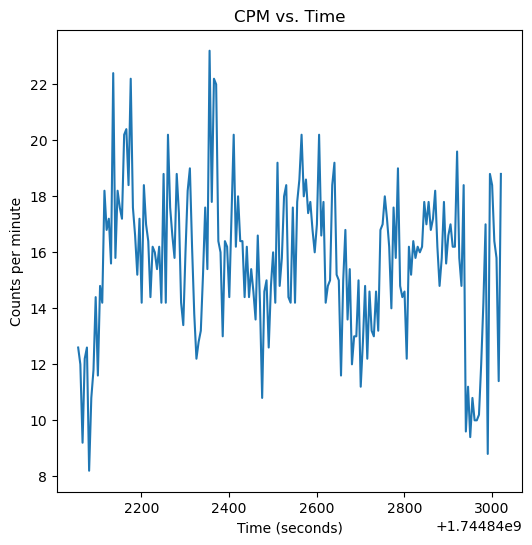

In [16]:
fig1=plt.figure(figsize=(6,6))
ax1=plt.axes()
ax1.plot(Data['Time'],Data['counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Counts per minute')
ax1.set_title('CPM vs. Time')

In [9]:
def Hist_Data(D,N):
    Hist=[]
    average=0
    for i in range(0,len(D['Time'])):
        average+=D['counts'][i]/N
        if i%N==0 and i!=0:
            Hist.append(average)
            average=0
    return Hist

Text(0.5, 1.0, 'CPM Distribution')

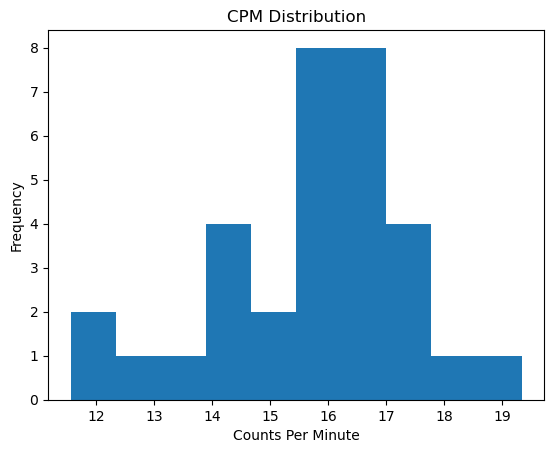

In [19]:
plt.hist(Hist_Data(Data,6),bins=10)
plt.xlabel('Counts Per Minute')
plt.ylabel('Frequency')
plt.title('CPM Distribution')

In [11]:
Data_Compiled = Hist_Data(Data,6)

In [12]:
np.std(Data_Compiled)

np.float64(1.6904215322212452)

In [13]:
true_std = np.sqrt(len(Data_Compiled))/np.sqrt(2*np.sqrt(len(Data)))
true_std

np.float64(1.0731752891293722)

# Conclusions / Discussion

### Discussion of Graph 1: Looking at the CPM vs Time graph, it's seen that the counts per minute varied enough over the course of our collection to suggest that the location had a significant impact on the measured counts per minute. While a more precise analysis isn't possible with our lack of specific coordinates or timepoints at specific locations, we can still see a general trend. Both in the beginning and towards the end of our timed collection the counts per minute are at relatively lower values. During these times we were collecting data outside, with the very beginning and towards the end (at roughly 2950 seconds) being collected at outside posiitons farthest from any buildings. This would explain the lower counts per minute as the sensor would be further from any sources in the surrounding buildings. Had we the 2.5 P data, this would likely be the opposite, having higher concentrations of particulate when outside exposed to more variable fluxuations in the weather (wind, etc...). Moving to the central part of graph, this collection took place primarily inside Evans Hall and outside between Evans and Hearst Mining Building. Both of these buildings, posessing labs and materials that would act as elevated sources from background levels, are responsible for the higher counts per minute. However, among these higher readings there are still dips. Perhaps these are a result of us moving from location to location, or perhaps they're a result of varied shielding while moving around in Evans (for instance, when walking down a staircase in Evans we were almost completely surrounded by concrete which acts as a significant amount of shielding.), or perhaps this is simply caused by the natural variance in the detector.

### Discussion of Histogram: From an initial look at the histogram, it's clear that the data loosely resembles a Gaussian normal distribution. This fact suggests primarily two things: Firstly, it suggests that we took sufficient data as to start obeying the Central Limit Theorem and converge towards a perfect Gaussian. This would make sense for the relative amount of data we took, measuring counts every five seconds and walking around for approximately twenty minutes, even after organizing these points into less bins in the actual histogram. Secondly, this suggests that while location does have an impact on the CPM, the route in which we took did not feature locations that had dramatically different CPM readings. As such, the general levels over the course of our route would produce a relatively equivalent dosage for anyone spending time in these areas. If there were some locations that had dramatically different readings, the shape of the histogram would not resemble a Gaussian as well and there would be relatively more outliers / higher frequency at outlier values for CPM. 

## Conclusions:

### After looking at our data, the standard deviation agrees with our results from two graphs, that is the CPM dose not change based on their corresponding locations. From histogram it tells us that the CPM behave similar to gaussian distribution and therefore suggests that the location is not large enough of a factor to influence results. The standard deviation obtained by equation predicting its behavior is incredibly close to the value obtained via testing, therefore it concludes that going outside did not have a large enough factor to effect predicted result, thus both sides of the statics agree upon the agreement where going outside did not have enough effect to change our predicted result. 